In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

In [10]:
df = pd.read_csv('Real estate.csv')
df = df.iloc[:,2:]
df.shape

(414, 6)

In [11]:
df.sample(10)

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
117,13.6,4197.34900,0,24.93885,121.50383,13.0
91,9.1,1402.01600,0,24.98569,121.52760,43.2
173,41.3,401.88070,4,24.98326,121.54460,35.1
191,13.2,750.07040,2,24.97371,121.54951,37.8
269,17.6,837.72330,0,24.96334,121.54767,23.0
33,16.5,323.65500,6,24.97841,121.54281,49.3
84,15.1,383.28050,7,24.96735,121.54464,43.7
20,4.5,2275.87700,3,24.96314,121.51151,29.3
172,6.6,90.45606,9,24.97433,121.54310,58.1
217,28.0,372.62420,6,24.97838,121.54119,40.8


In [12]:
df.describe()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


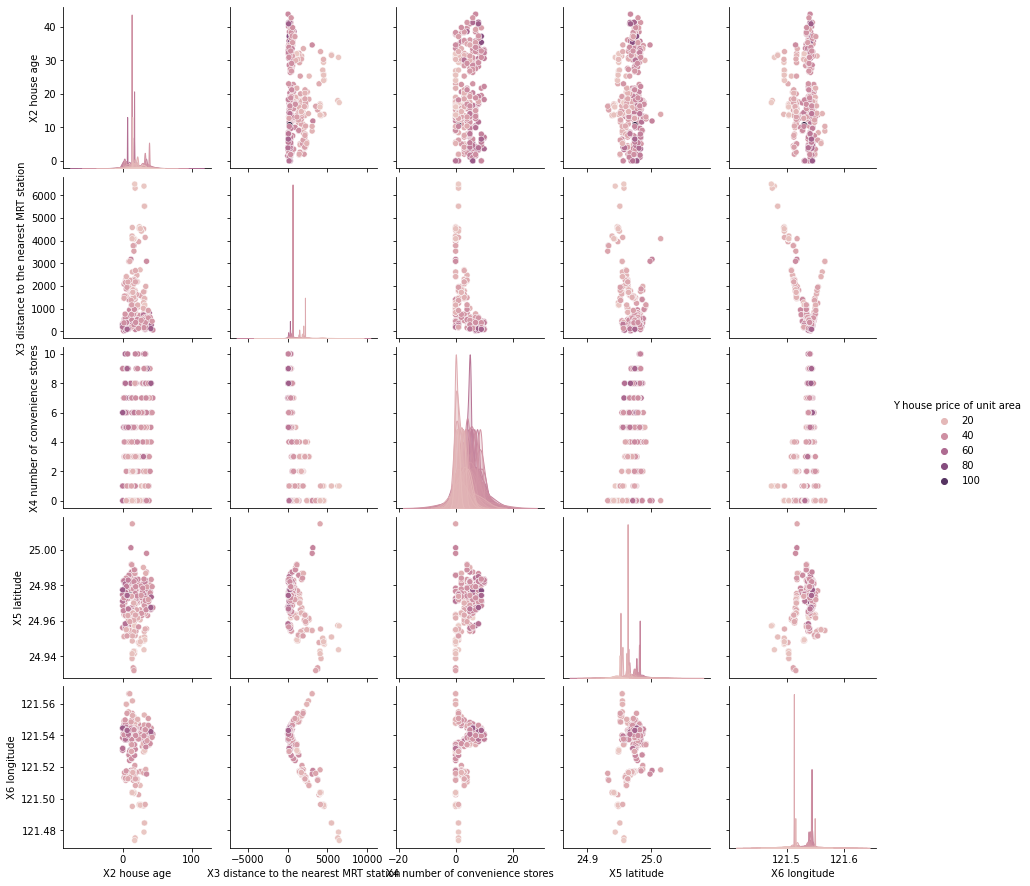

In [14]:
sns.pairplot(df, hue ='Y house price of unit area')

<AxesSubplot: xlabel='X2 house age', ylabel='Density'>

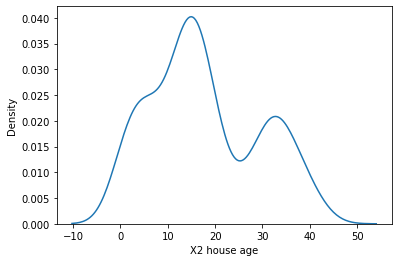

In [17]:
sns.kdeplot(df['X2 house age'])

<AxesSubplot: xlabel='X3 distance to the nearest MRT station', ylabel='Density'>

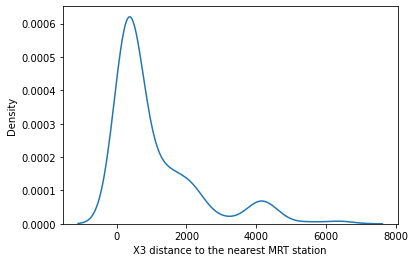

In [19]:
sns.kdeplot(df['X3 distance to the nearest MRT station'])

<AxesSubplot: xlabel='X4 number of convenience stores', ylabel='Density'>

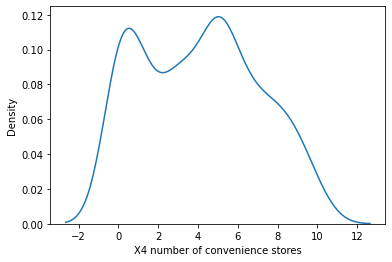

In [30]:
sns.kdeplot(df['X4 number of convenience stores'])

<AxesSubplot: xlabel='X5 latitude', ylabel='Density'>

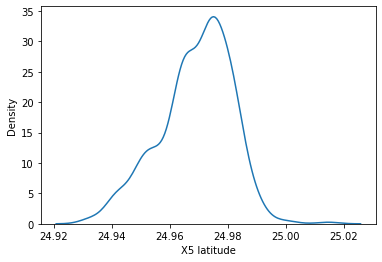

In [21]:
sns.kdeplot(df['X5 latitude'])

<AxesSubplot: xlabel='X6 longitude', ylabel='Density'>

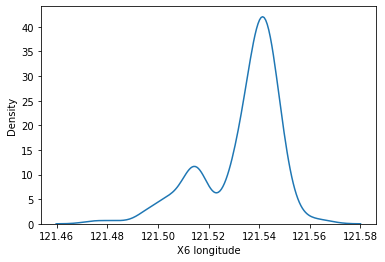

In [23]:
sns.kdeplot(df['X6 longitude'])

<AxesSubplot: xlabel='Y house price of unit area', ylabel='Density'>

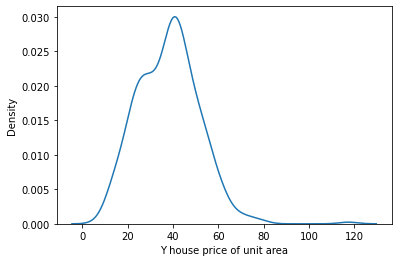

In [27]:
sns.kdeplot(df['Y house price of unit area'])

<AxesSubplot: xlabel='Y house price of unit area', ylabel='Count'>

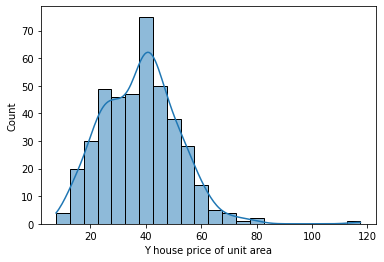

In [28]:
sns.histplot(df['Y house price of unit area'],kde=True)

In [42]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x, y,random_state=False, 
                                   test_size=0.2)
x_train

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
302,16.5,2288.01100,3,24.95885,121.51359
20,4.5,2275.87700,3,24.96314,121.51151
303,38.3,439.71050,0,24.97161,121.53423
142,19.8,640.60710,5,24.97017,121.54647
14,13.2,1164.83800,4,24.99156,121.53406
...,...,...,...,...,...
323,28.6,197.13380,6,24.97631,121.54436
192,43.8,57.58945,7,24.96750,121.54069
117,13.6,4197.34900,0,24.93885,121.50383
47,35.9,640.73910,3,24.97563,121.53715


In [56]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [57]:
y_pred

array([41.39074736, 12.35535341, 41.10500538, 12.16895621, 40.36129482,
       40.21203093, 39.90350957, 33.92740341, 48.09570524, 44.57950542,
       45.26308421, 40.66444206, 40.78477523, 40.21749212, 48.74518601,
       35.91657562, 40.00691534, 42.35745366, 41.86569963, 43.59017015,
       52.18882516, 30.84586302, 41.18004243, 45.92763544, 47.42648181,
       44.57007288, 45.07409463, 28.60802815, 47.7063895 , 23.6266334 ,
       42.74811911, 32.97533133, 44.01115269, 36.22167431, 45.20658972,
       30.79286498, 47.69431739, 38.96980714, 54.02064039, 10.13388451,
       51.27619778, 34.14524774, 35.86076275, 47.99091306, 14.72230198,
       42.56968095, 44.59486895, 15.28641683, 32.70221413, 46.4451428 ,
       51.97683302, 41.2912592 , 49.08218174, 24.51339343, 30.87236204,
       35.78072881, 48.51144284, 40.50194892, 45.36908028, 33.08132741,
       42.26857641, 42.28763303, 39.65314646, 48.25469934, 39.06506932,
       30.05772358, 12.57066321, 32.8104548 , 48.69693596, 40.21

In [61]:
pd.DataFrame(y_pred,y_test)

,0
Y house price of unit area,
45.3,41.390747
14.4,12.355353
46.0,41.105005
15.6,12.168956
50.2,40.361295
...,...
53.0,45.848138
38.2,43.241083
46.7,45.568955


In [58]:
import sklearn.metrics as mse

In [65]:
#print('mean_squerred_error:\t',mse.mean_squered_error(y_pred,y_test))
print('mean_absolute_error:\t',mse.mean_absolute_error(y_pred,y_test))
print('r2_score:\t',mse.r2_score(y_pred,y_test))

mean_absolute_error:	 5.74592747546254
r2_score:	 0.37398299413535085
